In [1]:
import ptc_track.optics_parameters as ptc_track_optics
import ptc_track.madx_configuration as ptc_track_conf
import ptc_twiss.optics_parameters as ptc_twiss_optics
import ptc_twiss.madx_configuration as ptc_twiss_conf
import approximator.optics_parameters as approximator_optics
import approximator.runner as aproximator_runner
import data.bunch_configuration as buc
import visualization.optics_parameter_visualisation as visualizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("whitegrid")

Welcome to JupyROOT 6.18/00


In [2]:
path_to_project = "/eos/user/r/rmucha/SWAN_projects"

optic_folder_name = "2016"

ptc_twiss_script_file_name = "ptc_twiss_script.madx"

xml_file_name = "configuration_reconst_beam1.xml"
item_number = 2

serialized_approximator_file_name = "parametrization_6500GeV_0p4_185_reco.root"
approximator_name = "ip5_to_station_220_h_2_lhcb1"

name_of_folder_with_sources = "optics_generator_python"

In [3]:
path_to_script = os.path.join(path_to_project, optic_folder_name, ptc_twiss_script_file_name)
s = 219.55
twiss_configuration = ptc_twiss_conf.TwissConfiguration(path_to_script, s)

In [4]:
path_to_optic = os.path.join(path_to_project, optic_folder_name)
path_to_xml_file = os.path.join(path_to_project, optic_folder_name, xml_file_name)
track_configuration = ptc_track_conf.TrackConfiguration(path_to_xml_file, item_number, path_to_optic)

In [5]:
path_to_sources = os.path.join(path_to_project, name_of_folder_with_sources)
path_to_approximator = os.path.join(path_to_optic, serialized_approximator_file_name)
approximator = aproximator_runner.get_approximator(path_to_sources, path_to_approximator, approximator_name)

In [6]:
# Parameters of bunch
x_mean = 0.0
sigma_x = 0
theta_x_mean = 1.5e-4
sigma_theta_x = 0
y_mean = -1.5e-3
sigma_y = 0
theta_y_mean = 0.00
sigma_theta_y = 0
pt_mean = -0.15
sigma_pt = 0.2

number_of_x_values = 1
number_of_theta_x_values = 1
number_of_y_values = 1
number_of_theta_y_values = 1
number_of_pt_values = 31

In [7]:
bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, number_of_x_values,
                                                        theta_x_mean, sigma_theta_x, number_of_theta_x_values,
                                                        y_mean, sigma_y, number_of_y_values,
                                                        theta_y_mean, sigma_theta_y, number_of_theta_y_values,
                                                        pt_mean, sigma_pt, number_of_pt_values)

In [8]:
title_suffix = "2016"

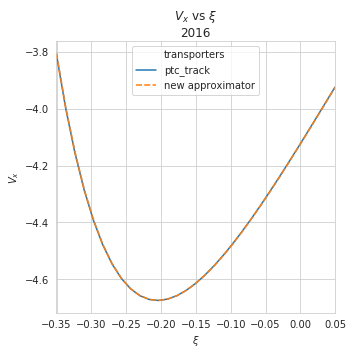

In [9]:
transporters = {
    "ptc_track": (ptc_track_optics.compute_v_x, track_configuration),
    "new approximator": (approximator_optics.compute_v_x, approximator),
}
visualizer.plot_optical_functions(bunch_configuration, transporters, "pt", "V x", title_suffix)

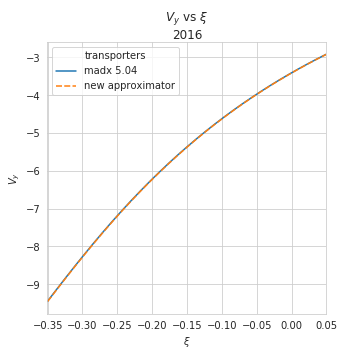

In [10]:
transporters = {
    "madx 5.04": (ptc_track_optics.compute_v_y, track_configuration),
    "new approximator": (approximator_optics.compute_v_y, approximator),
}
visualizer.plot_optical_functions(bunch_configuration, transporters, "pt", "V y", title_suffix)

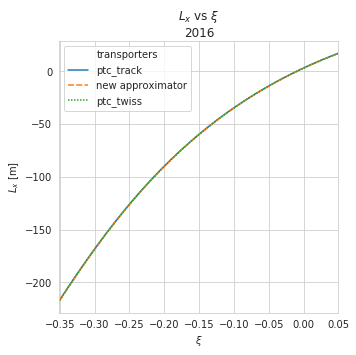

In [11]:
transporters = {
    "ptc_track": (ptc_track_optics.compute_l_x, track_configuration),
    "new approximator": (approximator_optics.compute_l_x, approximator),
    "ptc_twiss": (ptc_twiss_optics.compute_l_x, twiss_configuration)
}
visualizer.plot_optical_functions(bunch_configuration, transporters, "pt", "L x", title_suffix)

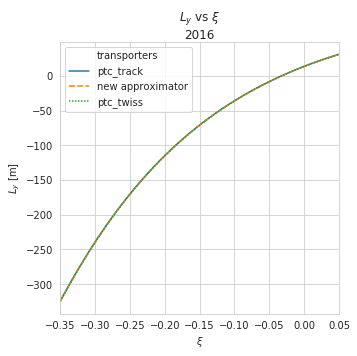

In [12]:
transporters = {
    "ptc_track": (ptc_track_optics.compute_l_y, track_configuration),
    "new approximator": (approximator_optics.compute_l_y, approximator),
    "ptc_twiss": (ptc_twiss_optics.compute_l_y, twiss_configuration)
}
visualizer.plot_optical_functions(bunch_configuration, transporters, "pt", "L y", title_suffix)

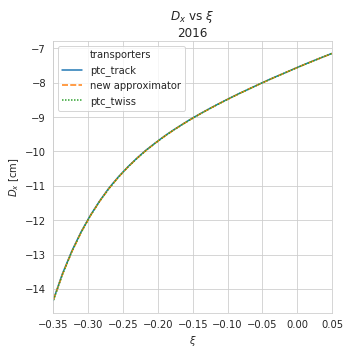

In [13]:
transporters = {
    "ptc_track": (ptc_track_optics.compute_d_x, track_configuration),
    "new approximator": (approximator_optics.compute_d_x, approximator),
    "ptc_twiss": (ptc_twiss_optics.compute_d_x, twiss_configuration)
}
visualizer.plot_optical_functions(bunch_configuration, transporters, "pt", "D x", title_suffix)

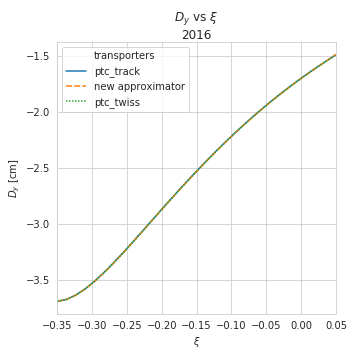

In [14]:
transporters = {
    "ptc_track": (ptc_track_optics.compute_d_y, track_configuration),
    "new approximator": (approximator_optics.compute_d_y, approximator),
    "ptc_twiss": (ptc_twiss_optics.compute_d_y, twiss_configuration)
}
visualizer.plot_optical_functions(bunch_configuration, transporters, "pt", "D y", title_suffix)